In [307]:
import numpy as np
import matplotlib.pyplot as plt

In [194]:
w = [600, 180, 250, 500, 400, 250, 380, 400] # grams
v = [1.35, 2.25, 2.5, 4.5, 1.75, 2.5, 2, 3.5] # pound sterling
x = [0, 1, 1, 1, 0, 0, 0, 0]

1. Write a function in Python that takes a decision array x, a weight array w, a value array
v, a limit on weight W , a penalty multiplier r and an exponent β, and returns the result of
φstatic(x, f (·), g(·)) in equation (4).

In [195]:
def func(v, x):
    result = 0
    for i in range(len(x)):
        vi = v[i]; xi = x[i]  
        result = result + vi * xi
    return result
print(func(v, x))

def g(w, x):
    result = 0
    for i in range(len(x)):
        wi = w[i]; xi = x[i]
        result = result + wi * xi
    return result
print(g(w, x))

def static_func(v, w, x, limit_on_weight, penalty_multiplier, exponent_b):
    return func(v, x) - penalty_multiplier * max(0, g(w, x) - limit_on_weight) ** exponent_b
print(static_func(v, w, x, 1200, 2, 1))

9.25
930
9.25


2. Implement a function for generating a random population (as a 2-dimensional binary array).
This function should take the number of rows and number of columns as parameters.

In [174]:
np.random.seed(12345)
def generate_random_population(rows, columns):
    return np.random.randint(0, 2, size = (rows, columns))
population = generate_random_population(20, len(x))
print(population)

[[0 1 1 1 0 1 0 0]
 [1 0 1 1 0 1 1 0]
 [1 1 1 0 0 0 1 1]
 [1 0 1 0 0 1 1 1]
 [1 1 0 1 1 1 1 1]
 [1 0 0 1 1 0 0 1]
 [1 1 1 0 1 1 1 1]
 [0 1 1 0 1 0 0 1]
 [1 1 0 0 1 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 1 0]
 [0 0 1 0 0 1 0 1]
 [0 1 0 0 0 1 1 0]
 [0 1 0 1 0 0 1 1]
 [0 1 1 0 0 1 0 0]
 [1 1 1 1 0 0 0 1]
 [0 1 0 0 1 1 0 1]
 [0 1 0 1 1 1 0 1]
 [0 0 0 1 1 0 0 0]]


generate f_vector

In [175]:
f_vector = []
for x_vector in population:
    f_vector.append(static_func(v, w, x_vector, 1200, 2, 1))
print(f_vector)    


[11.75, -1547.15, -1208.4, -1348.15, -3002.15, -1388.9, -2504.15, -50.0, -712.65, 7.0, 4.5, -1504.5, 8.5, 6.75, -507.75, 7.25, -1445.9, -50.0, -1045.5, 6.25]


3. Implement the truncation selection function with k = 4.

In [176]:
def truncation(f_vector, k, to_choose = 4):
    candidate_inds = np.argsort(f_vector)[:k]
    picked_inds = np.random.choice(candidate_inds, 
                                  size = to_choose,
                                  replace = False)
    return picked_inds
print(truncation(f_vector, 4, 2))

[ 6 11]


4. Implement the one-point crossover function.

In [177]:
def one_point_cx(a, b):
    inds = np.arange(a.shape[0])
    point = np.random.choice(inds)
#     print(point)
    c = np.concatenate([a[:point], b[point:]])
    d = np.concatenate([b[:point], a[point:]])
    return c, d
a = np.array([0, 0, 1, 1, 1, 1, 0])
b = np.array([0, 0, 1, 0, 1, 0, 0])
c, d = one_point_cx(a, b)
print(c, d)

[0 0 1 1 1 0 0] [0 0 1 0 1 1 0]


5. Implement the bitwise mutation.

In [178]:
def flip_bit_mutation(c, prob = None):
    if prob is None:
        prob = 1 / len(c)
    bits = []
    for i in range(c.shape[0]):
        r = np.random.random()
        if r < prob:
            bits.append(int(not(c[i])))
        else:
            bits.append(c[i])
    return np.array(bits)
x_premium = flip_bit_mutation(np.array(x))
print(x_premium)

[0 1 1 1 1 0 0 0]


6. Implement the Genetic Algorithm discussed in the lecture, and run it using the following
hyper-parameters:

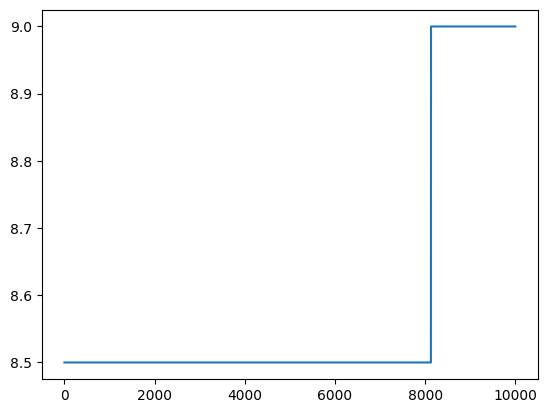

value: 9.0
ind: 16269
best pop: [0 0 1 1 0 0 1 0]
grams: 1130


In [325]:
m = 10 # pop size
K = 10000 # num of generations
p_c = 0.8 # crossover probability
p_m = 0.2 # mutation probability

def gen():
    population = generate_random_population(m, len(x))
    
    f_vector = []
    for x_vector in population:
        f_vector.append(static_func(v, w, x_vector, 1200, 2, 1))
    min_f_vs_gens = [max(0, max(f_vector))]
    
    for k in range(1, K + 1):
        a_i, b_i = truncation(f_vector, 4, 2)
        a, b = population[a_i], population[b_i] 
        r = np.random.random()
        
        if r < p_c:
            c1, c2 = one_point_cx(a, b)
        else:
            c1, c2 = a, b
        if r < p_m:
            c1_prem, c2_prem = flip_bit_mutation(c1), flip_bit_mutation(c2)
        else:
            c1_prem, c2_prem = c1, c2
        population = np.vstack([population, c1_prem, c2_prem])
        f_vector.append(static_func(v, w, c1_prem, 1200, 2, 1))
        f_vector.append(static_func(v, w, c2_prem, 1200, 2, 1))
        min_f_vs_gens.append(max(0, max(f_vector)))
#     print(min_f_vs_gens)
    x_cord = np.linspace(0, len(min_f_vs_gens), num = len(min_f_vs_gens), dtype = int)
    
#     print(min_f_vs_gens)
    plt.plot(x_cord, min_f_vs_gens)
    plt.show()
    return population

genetic_algorithm = gen()

f_vector = []
for x_vector in genetic_algorithm:
    f_vector.append(static_func(v, w, x_vector, 1200, 2, 1))

max_ind = np.argmax(f_vector)
max_pop = genetic_algorithm[max_ind]
print('value:', f_vector[max_ind])
print('ind:', max_ind)
print('best pop:', max_pop)
print('grams:', g(w, max_pop))